# Árvore de decisão

**Uma árvore de decisão** é uma **representação de um conjunto de regras criado para tomar qualquer decisão**, nesse caso, classificar um registro ou estimar um valor

Para cada pergunta da árvore, será respondido com "Sim" e "Não", sendo que essas respostas irão guiar para a decisão final.

- Cada pergunta será um **nó de decisão( sendo o primeiro nó, o nó raiz)** e a decisão final tomada é chamada de **nó folha**.

O objetivo desde arquivo/projeto é estudar o algoritmo de aprendizado de máquina de árvore de decisão.

In [71]:
# Importando os recursos e bibliotecas necessários
from sklearn.datasets import load_iris
import pandas as pd

In [72]:
# Carregando os arquivos em um dataframe
data = load_iris()
dataset = pd.DataFrame(data.data)
dataset.columns = data.feature_names

In [73]:
# Criando a coluna target do dataset
dataset["target"] = data.target

In [74]:
# Visualizando o dataset
display(dataset)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
# A variável target possui três valores distintos [0, 1, 2]. Vamos simplificar
# o dataset em um primeiro momento, tanto para que a variável target possua apenas dois valores
# como para trabalharmos bidimensionalmente, apenas com a largura e comprimento da pétala.

dataset1 = dataset.loc[
    dataset.target.isin([0, 1]), ["petal length (cm)", "petal width (cm)", "target"]
]

In [76]:
# Visualizando o novo dataset
dataset1.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


# Preparando os dados de treino

In [77]:
X = dataset1.drop("target", axis=1)  # Selecionando as features do modelo
y = dataset1.target  # Selecionado a coluna target por interface orientada a objeto

In [78]:
# Importando a função que prepara os conjuntos de treinamento e teste pro dataset1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Visualizando os dados em um gráfico bidimensional


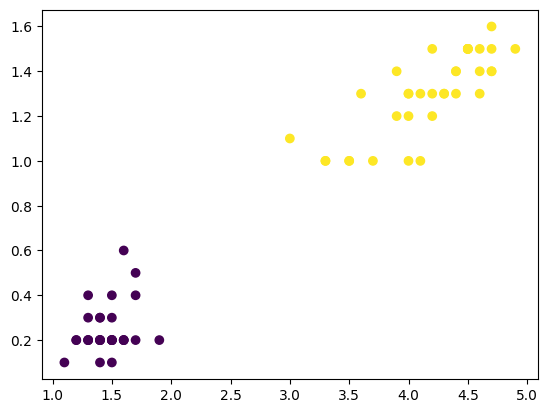

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train)
plt.show()

# Classificando e realizando o treinamento do algoritmo

In [80]:
# Importando o algoritmo de árvore de decisão
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [81]:
# Realizando o treinamento
clf = clf.fit(X_train, y_train)

In [82]:
# Testando o classificador
clf.score(X_test, y_test)

1.0

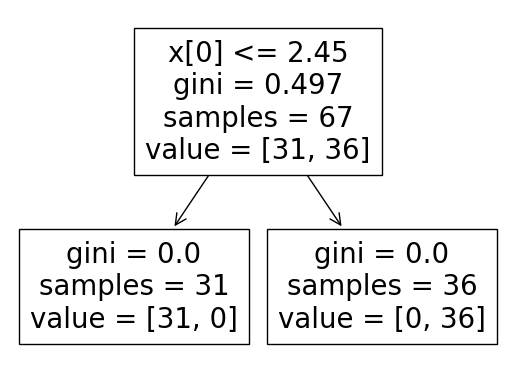

In [83]:
# Visualizando as decisões que foram tomadas no algoritmo
fig, ax = plt.subplots()

tree.plot_tree(clf)
plt.show()

Como o conjunto está em um estado simplificado o algoritmo só precisou criar **pergunta** para fazer a classificação coerentemente.
- A pergunta é: se o valor em x[1], eixo y, for menor ou igual 0.8 terá uma classificação, senão terá outra.

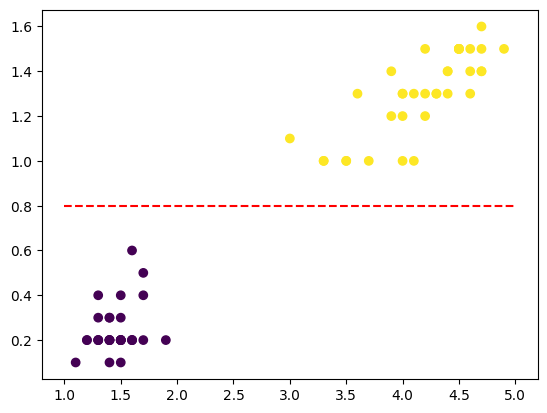

In [84]:
fig, ax = plt.subplots()

ax.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train)

# Decisão tomando pelo algoritmo
ax.plot([1, 5], [0.8, 0.8], "--r")

plt.show()

In [85]:
# Realizando previsão e avaliando o erro
y_pred = clf.predict(X_test)

In [86]:
# Importando a matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]], dtype=int64)

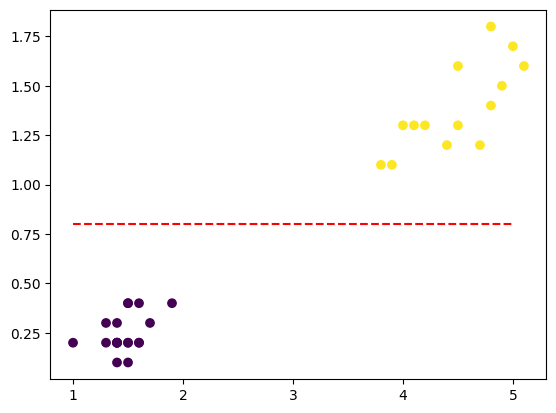

In [87]:
fig, ax = plt.subplots()

ax.scatter(X_test["petal length (cm)"], X_test["petal width (cm)"], c=y_test)

# Decisão tomando pelo algoritmo
ax.plot([1, 5], [0.8, 0.8], "--r")

plt.show()

# Modificando os dados

Esse exemplo está muito simples devido aos dados serem linearmente separáveis, contudo se modificarmos o dataset para separar valores entre [1, 2] ao invés de [0, 1] teremos um novo resultado.

In [88]:
dataset1 = dataset.loc[
    dataset.target.isin([1, 2]), ["petal length (cm)", "petal width (cm)", "target"]
]

X = dataset1.drop("target", axis=1)  # Selecionando as features do modelo
y = dataset1.target  # Selecionado a coluna target por interface orientada a objeto

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

clf = tree.DecisionTreeClassifier(random_state=42)

# Realizando o treinamento
clf = clf.fit(X_train, y_train)

In [89]:
# Testando o classificador
clf.score(X_test, y_test)

0.7878787878787878

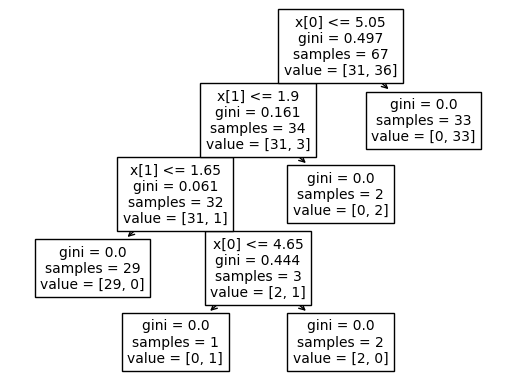

In [90]:
# Visualizando as decisões que foram tomadas no algoritmo
fig, ax = plt.subplots()

tree.plot_tree(clf)
plt.show()

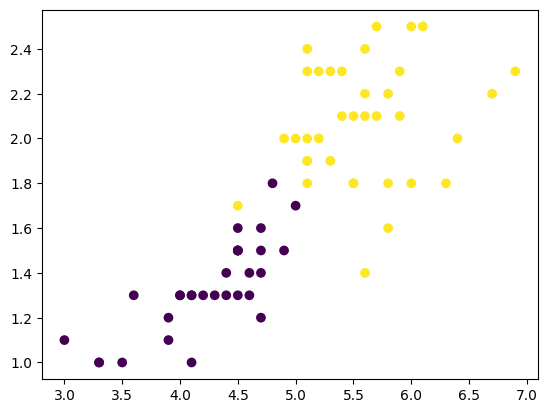

In [91]:
fig, ax = plt.subplots()

ax.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train)
plt.show()

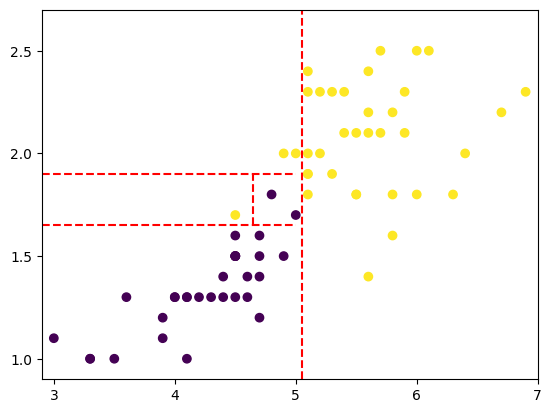

In [92]:
# Vamos observar as decisões do algoritmo e representá-las em um gráfico
# x[1] é o eixo y
# x[0] é o eixo x

fig, ax = plt.subplots()

ax.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train)

# Define os limites do plot, melhorando a visualização e orientação
ax.set(xlim=(2.9, 7), xticks=[3, 4, 5, 6, 7], ylim=(0.9, 2.7), yticks=[1, 1.5, 2, 2.5])

# A primeira decisão é em x[0], logo eixo x, portanto o y é constante
ax.plot([5.05, 5.05], [0.9, 2.7], "--r")

# A segunda decisão é em x[1], logo eixo y, portanto x é constante
# Atenção que a segunda decisão é restrita até x = 5
ax.plot([2.9, 5], [1.9, 1.9], "--r")

# Terceira decisão, em x[1], logo eixo y, portante x é constante
# Atenção que a segunda decisão é restrita até x = 5
ax.plot([2.9, 5], [1.65, 1.65], "--r")

# Quarta decisão, em x[0], logo eixo x
# Atenção, o intervalo de y é entre um intervalo
ax.plot([4.65, 4.65], [1.65, 1.9], "--r")

plt.show()

In [93]:
# Testando o algoritmo para o conjunto de teste
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 6,  8]], dtype=int64)

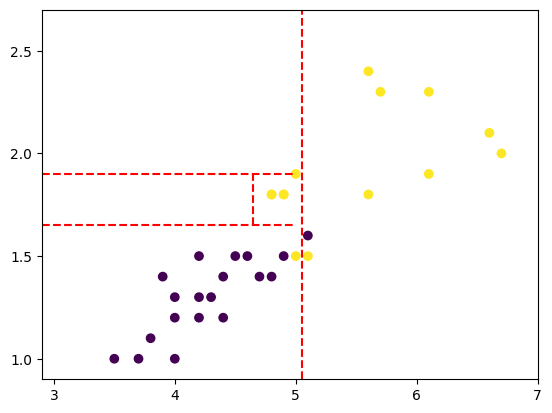

In [94]:
# Visualizando os dados de teste
# Vamos observar as decisões do algoritmo e representá-las em um gráfico
# x[1] é o eixo y
# x[0] é o eixo x

fig, ax = plt.subplots()

ax.scatter(X_test["petal length (cm)"], X_test["petal width (cm)"], c=y_test)

# Define os limites do plot, melhorando a visualização e orientação
ax.set(xlim=(2.9, 7), xticks=[3, 4, 5, 6, 7], ylim=(0.9, 2.7), yticks=[1, 1.5, 2, 2.5])

# A primeira decisão é em x[0], logo eixo x, portanto o y é constante
ax.plot([5.05, 5.05], [0.9, 2.7], "--r")

# A segunda decisão é em x[1], logo eixo y, portanto x é constante
# Atenção que a segunda decisão é restrita até x = 5
ax.plot([2.9, 5], [1.9, 1.9], "--r")

# Terceira decisão, em x[1], logo eixo y, portante x é constante
# Atenção que a segunda decisão é restrita até x = 5
ax.plot([2.9, 5], [1.65, 1.65], "--r")

# Quarta decisão, em x[0], logo eixo x
# Atenção, o intervalo de y é entre um intervalo
ax.plot([4.65, 4.65], [1.65, 1.9], "--r")

plt.show()

# Utilizando todos os dados do dataset

In [95]:
X = dataset.drop("target", axis=1)  # Selecionando as features do modelo
y = dataset.target  # Selecionado a coluna target por interface orientada a objeto

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

clf2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [98]:
# Verificando a precisão da árvore de decisão
clf2.score(X_train, y_train)

1.0

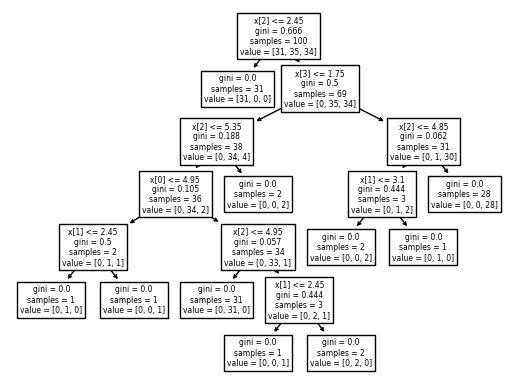

In [97]:
# Visualizando a árvore de decisão
tree.plot_tree(clf2)
plt.show()

In [100]:
# Fazendo previsão
y_pred2 = clf2.predict(X_test)

In [101]:
# Avaliando o modelo
confusion_matrix(y_test, y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)